# Linear Regression

Code to run regression model...

In [1]:
# %matplotlib inline
# pyplot should make the above line redundant
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)

df = pd.read_csv('exams.csv')

In [5]:
df.shape

(1000, 8)

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [36]:
#assigning X and Y
X = df['math score'].values
Y = df['reading score'].values

#mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#total number of values
n= len(X)

#formula to obtain m(b1) and c(b0)
numer = 0
denom = 0
for i in range (n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#display coefficients
print(b1, b0)

0.7839891977418261 16.948253226733712


now we have b1 and b0, or m and c respectively;
our regression line should look like:
y= 0.784x + 16.948
we will attempt to plot our regression line, and scatter data...

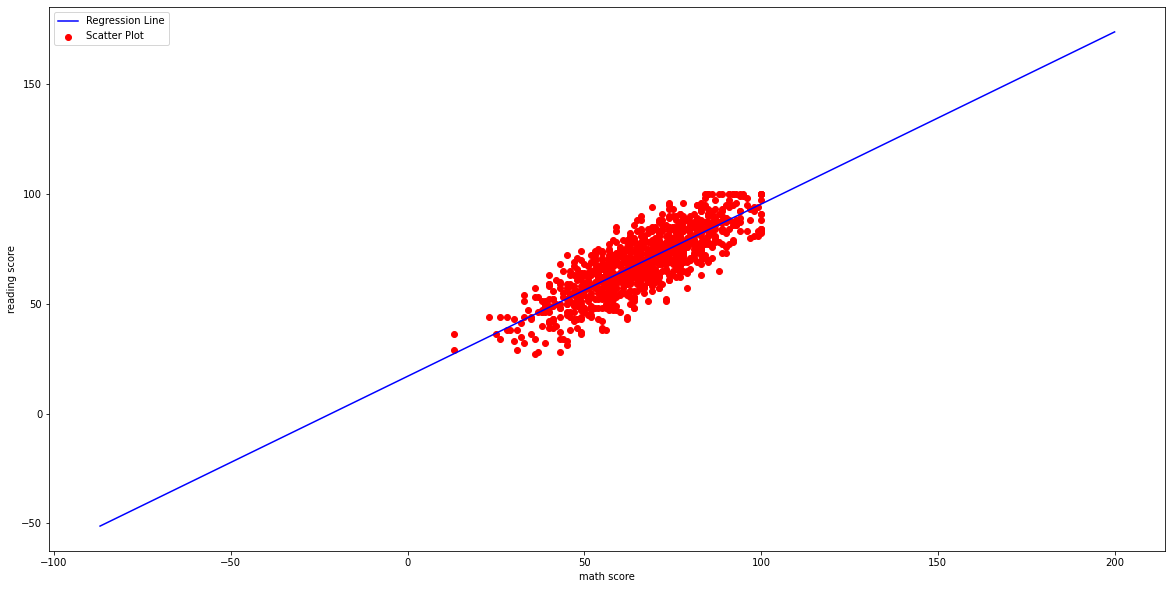

In [25]:
#plot values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculate line values x and y
x = np.linspace (min_x, max_x, 1000)
y = b0 + b1 * x

#plot line
plt.plot(x, y, color = 'b', label = 'Regression Line')

#plot scatter points
plt.scatter(X, Y, c = 'r', label = 'Scatter Plot')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.legend()
plt.show()

everything appears to be working fine, but I am unsure if the command plt.show is needed; I ran with and without, and do not see a difference...

lastly, we shall check for accuracy...

In [19]:
#obtain r2
ss_t = 0 #sum of squares
ss_r = 0 #sum of squares of residuals
for i in range (n):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6714123360123609


I would have predicted an even higher r squared, as the points appear highly correlated, but as we are working with quite a bit of datapoints, it is akin to viewing from a distance. Or, it could just be that the most of the points are not ACTUALLY touching the regression line, so there is some residual...

next, we shall run an ML program from sklearn, and see if we obtain the same r2 (which we should)...

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use Rank 1 matrix in Scikit
X = X.reshape((n, 1))

#create model
reg = LinearRegression()

#fit training data
reg = reg.fit(X,Y)
#Y prediction
Y_pred = reg.predict(X)

#calculate r2
r2_score = reg.score(X, Y)

print(r2_score)

0.6714123360123606


we obtained the same number as before, giving us more confidence...